### Confidence Interval - Difference In Means

Here you will look through the example from the last video, but you will also go a couple of steps further into what might actually be going on with this data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

In [3]:
sample_data.head()

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


`1.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for coffee and non-coffee drinkers.  Build a 99% confidence interval using your sampling distribution.  Use your interval to start answering the first quiz question below.

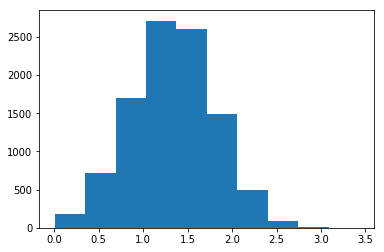

In [5]:
diff_avg_height = []

for i in range(10000):
    bootstrap_sample_data = sample_data.sample(200, replace=True)
    coffee_drinkers_height = bootstrap_sample_data[bootstrap_sample_data["drinks_coffee"]==True]["height"].mean()
    non_coffee_drinkers_height = bootstrap_sample_data[bootstrap_sample_data["drinks_coffee"]==False]["height"].mean()
    diff_height = abs(coffee_drinkers_height - non_coffee_drinkers_height)
    
    diff_avg_height.append(diff_height)
    
plt.hist(diff_avg_height);

In [6]:
np.percentile(diff_avg_height, 0.5), np.percentile(diff_avg_height, 99.5)

(0.14511038326333725, 2.5164909371295865)

`2.` For 10,000 iterations, bootstrap sample your sample data, compute the difference in the average heights for those older than 21 and those younger than 21.  Build a 99% confidence interval using your sampling distribution.  Use your interval to finish answering the first quiz question below.  

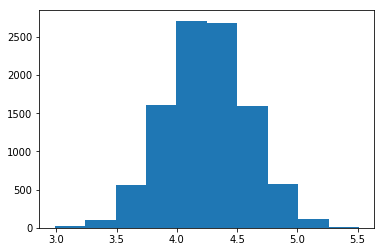

In [12]:
diff_avg_height = []

for _ in range(10000):
    bootstrap_sample_data = sample_data.sample(200, replace=True)
    avg_height_older = bootstrap_sample_data[bootstrap_sample_data["age"]== '>=21']["height"].mean()
    avg_height_younger = bootstrap_sample_data[bootstrap_sample_data["age"]== '<21']["height"].mean()
    
    diff = abs(avg_height_older - avg_height_younger)
    diff_avg_height.append(diff)
    
plt.hist(diff_avg_height);

In [13]:
np.percentile(diff_avg_height, 0.5), np.percentile(diff_avg_height, 99.5)

(3.3667113781707676, 5.1321276562621989)

`3.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **under** 21 years old.  Using your sampling distribution, build a 95% confidence interval.  Use your interval to start answering question 2 below.

In [15]:
diff_avg_height = []

for _ in range(10000):
    bootstrap_sample_data = sample_data.sample(200, replace=True)
    younger_sample_data = bootstrap_sample_data[bootstrap_sample_data["age"]== '<21']
    avg_height_coffee = younger_sample_data[younger_sample_data["drinks_coffee"] == True]["height"].mean()
    avg_height_non_coffee = younger_sample_data[younger_sample_data["drinks_coffee"] == False]["height"].mean()
    
    diff = abs(avg_height_coffee - avg_height_non_coffee)
    diff_avg_height.append(diff)
    
print(np.percentile(diff_avg_height, 2.5), np.percentile(diff_avg_height, 97.5))

1.085481011 2.58967896201


`4.` For 10,000 iterations bootstrap your sample data, compute the **difference** in the average height for coffee drinkers and the average height for non-coffee drinkers for individuals **over** 21 years old.  Using your sampling distribution, build a 95% confidence interval. Use your interval to finish answering the second quiz question below. As well as the following questions. 

In [17]:
diff_avg_height = []

for _ in range(10000):
    bootstrap_sample_data = sample_data.sample(200, replace=True)
    older_sample_data = bootstrap_sample_data[bootstrap_sample_data["age"]== '>=21']
    avg_height_coffee = older_sample_data[older_sample_data["drinks_coffee"] == True]["height"].mean()
    avg_height_non_coffee = older_sample_data[older_sample_data["drinks_coffee"] == False]["height"].mean()
    
    diff = abs(avg_height_coffee - avg_height_non_coffee)
    diff_avg_height.append(diff)
    
print(np.percentile(diff_avg_height, 2.5), np.percentile(diff_avg_height, 97.5))

1.8285955382 4.38058142574
